In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
plt.style.use('ggplot')

In [2]:
# useful functions
# ================
def total_return(prices):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    prices : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return prices.iloc[-1] / prices.iloc[0] - 1


def total_return_from_returns(returns):
    """Retuns the return between the first and last value of the DataFrame.

    Parameters
    ----------
    returns : pandas.Series or pandas.DataFrame

    Returns
    -------
    total_return : float or pandas.Series
        Depending on the input passed returns a float or a pandas.Series.
    """
    return (returns + 1).prod() - 1

def multi_period_return(period_returns):
     return np.prod(period_returns + 1) - 1

def plot_this(df, title, figsize=None, ylabel='',
             output_file='imgs/fig.png', bottom_adj=0.25,
             txt_ymin=-0.4, bar=False):
    if bar:
        ax = df.plot.bar(title=title, figsize=figsize)
    else:
        ax = df.plot(title=title, figsize=figsize)
    sns.despine()
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.text(0, txt_ymin, asset_info, transform=ax.transAxes, fontsize=9)
    plt.gcf().subplots_adjust(bottom=bottom_adj)
    plt.savefig(output_file, **kw_save)

In [3]:
## SP500 contains the monthly datasets for S&P figures

#sp_data = pd.read_csv('sp500.csv')
sp_data = pd.read_csv('sp500.csv',
                      header=0,
                      names=['timepoint','open','high','low','close','adjclose','volume'],
                      parse_dates=True,index_col=0)


savings_data = pd.read_csv('savings_interest.csv',
                      header=0,
                      names=['timepoint','rate'],
                      parse_dates=True,index_col=0)


savings_data = savings_data[datetime.date(year=1990,month=1,day=1):datetime.date(year=2017,month=4,day=1)]



#sp_data_adjclose = sp_data[['Date','Adj Close']]

#sp_data_adjclose = sp_data_adjclose.astype({"Date":dt.date,"Adj Close":np.float})

print(sp_data.columns)

sp_data.describe()




#print(sp_data_adjclose.columns)

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume'], dtype='object')


,open,high,low,close,adjclose,volume
count,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7.274000e+03
mean,1203.299483,1210.293744,1195.826012,1203.553540,1203.553540,2.130960e+09
std,602.232272,604.422513,599.807315,602.228652,602.228652,1.764898e+09
min,295.450012,301.450012,294.510010,295.459991,295.459991,1.499000e+07
25%,770.550019,777.917481,763.404984,770.167496,770.167496,4.866900e+08
50%,1173.785034,1182.054993,1165.660034,1173.815002,1173.815002,1.546375e+09
75%,1439.007507,1449.200012,1430.515015,1439.617462,1439.617462,3.505905e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


In [4]:
print(savings_data.columns)

savings_data.describe()


Index(['rate'], dtype='object')


,rate
count,328.000000
mean,3.601372
std,2.884788
min,0.170000
25%,0.970000
50%,3.128500
75%,4.856500
max,13.670000


In [5]:
sp_data = sp_data.asfreq(freq='1D', method='ffill')

sp_data.describe()

,open,high,low,close,adjclose,volume
count,10539.000000,10539.000000,10539.000000,10539.000000,10539.000000,1.053900e+04
mean,1203.751125,1210.635869,1196.317005,1203.985722,1203.985722,2.121681e+09
std,601.287947,603.471900,598.909589,601.313592,601.313592,1.773129e+09
min,295.450012,301.450012,294.510010,295.459991,295.459991,1.499000e+07
25%,774.244995,779.985016,766.200012,773.760010,773.760010,4.837950e+08
50%,1173.800049,1182.239990,1166.709961,1173.969971,1173.969971,1.531600e+09
75%,1440.215027,1448.930054,1430.150024,1439.105041,1439.105041,3.490785e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


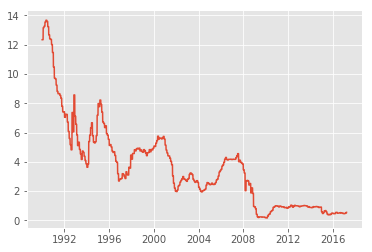

In [5]:
savings_data = savings_data.asfreq(freq='1D', method='ffill')

#savings_data.describe()

plt.plot(savings_data['rate'], label='Rate')

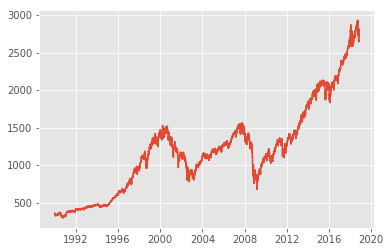

In [6]:
start = dt.datetime(1995,1,1)
end = dt.datetime(2018,1,1)



sp_data['year'] = sp_data.index.year
sp_data['month'] = sp_data.index.month
sp_data['day'] = sp_data.index.day



#print(sp_data)

plt.plot(sp_data['adjclose'], label='Adj Close')



In [7]:
plt.show()

In [8]:
##approach 0 tracks daily S&P 
#sp_approach0 = sp_data['adjclose'].copy(deep=True)
sp_approach0 = sp_data['adjclose'].pct_change()

rolling_return_0 = sp_approach0.rolling('1095D').apply(multi_period_return).fillna(0)

##approach 1 tracks S&P with 200 perids
#sp_approach1 = sp_data['adjclose'].pct_change(periods=20).fillna(0)

##approach 1 tracks daily S&P
sp_approach2 = sp_data['adjclose'].resample('M').mean()

sp_approach2 = sp_approach2.asfreq(freq='1D', method='ffill')

sp_approach2 = sp_approach2.pct_change()

rolling_return_2 = sp_approach2.rolling('1095D').apply(multi_period_return).fillna(0)


savings_return = savings_data.rolling('1095D').mean().fillna(0)

savings_return = savings_return.mul(0.01)

print(savings_return)



C:\install\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


                rate
timepoint           
1990-01-01  0.123400
1990-01-02  0.123400
1990-01-03  0.123400
1990-01-04  0.123400
1990-01-05  0.123400
1990-01-06  0.123400
1990-01-07  0.123400
1990-01-08  0.123400
1990-01-09  0.123400
1990-01-10  0.123400
1990-01-11  0.123400
1990-01-12  0.123400
1990-01-13  0.123400
1990-01-14  0.123400
1990-01-15  0.123400
1990-01-16  0.123400
1990-01-17  0.123400
1990-01-18  0.123400
1990-01-19  0.123400
1990-01-20  0.123400
1990-01-21  0.123400
1990-01-22  0.123400
1990-01-23  0.123400
1990-01-24  0.123400
1990-01-25  0.123400
1990-01-26  0.123400
1990-01-27  0.123400
1990-01-28  0.123400
1990-01-29  0.123400
1990-01-30  0.123400
...              ...
2017-03-03  0.006147
2017-03-04  0.006143
2017-03-05  0.006140
2017-03-06  0.006136
2017-03-07  0.006133
2017-03-08  0.006130
2017-03-09  0.006126
2017-03-10  0.006123
2017-03-11  0.006120
2017-03-12  0.006116
2017-03-13  0.006113
2017-03-14  0.006109
2017-03-15  0.006106
2017-03-16  0.006103
2017-03-17  0

C:\install\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


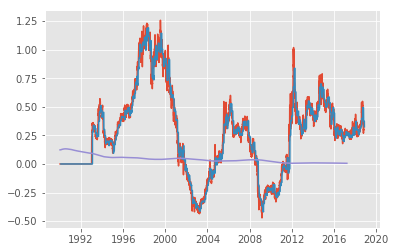

In [9]:
#plt.plot (sp_approach0)
plt.plot (rolling_return_0)
#plt.plot (sp_approach2)
plt.plot (rolling_return_2)
#plt.plot (sp_approach1)
#plt.plot (sp_approach2)

plt.plot (savings_return)



In [10]:
rolling_return_0 = rolling_return_0.astype('float64')

#sp_approach0 = sp_approach0.astype('float64')
#sp_approach1 = sp_approach1.astype('float64')
#sp_approach2 = sp_approach2.astype('float64')


#sp_approach0 = sp_approach0.cumsum()
#sp_approach1 = sp_approach1.cumsum()
#sp_approach2 = sp_approach2.cumsum()

#plt.plot (sp_approach0)
#plt.plot (sp_approach1)
#plt.plot (sp_approach2)


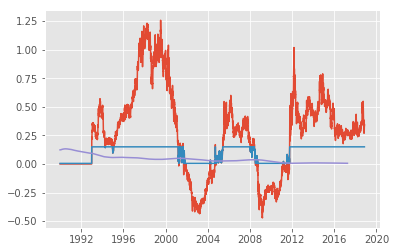

In [12]:

#sp_approach0 = sp_approach0.apply(lambda x:x**2)

cap_return = float(.15)
floor_return = float(.005)


rolling_return_cap_floor = rolling_return_0.apply(lambda x:cap_return if x>cap_return else (floor_return if x<floor_return else x))
#sp_approach1 = sp_approach1.apply(lambda x:.15 if x>.15 else (0.005 if x<0.005 else x))

#sp_approach0.head(20)
#plt.plot (sp_approach0)
plt.plot (rolling_return_0)
plt.plot (rolling_return_cap_floor)
plt.plot (savings_return)

#plt.plot (sp_approach1)

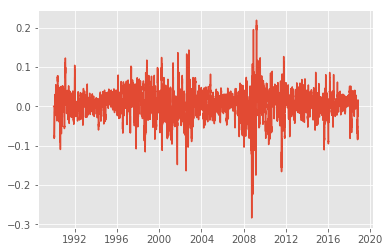

In [78]:
plt.plot (sp_approach1)

#plot_this(approach1, bar=True, title='Trailing returns: Approach 1',
 #         ylabel='Returns (parts per unit)', txt_ymin=-0.4, bottom_adj=0.25,
  #        output_file='./imgs/fig_rets_approach1.png')

In [79]:
plt.show()